In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import warnings 
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings("ignore")

## Load Dataset

In [119]:
# creating database connection
conn= sqlite3.connect("inventory.db")

# fetching vendor summary data
df = pd.read_sql_query("select * from Vendor_Sales_Summary", conn)
df.head(5)

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,33.864673,0.037271,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,26.682999,0.042125,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,32.759433,0.054746,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,37.249347,0.061453,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,39.689707,0.044932,1.396897


## Exploratory Data Analysis
* Previously, we examined the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis.
* In this phase of EDA, we will analyze the resultant table to gain insghts into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before with further analysis.


In [108]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.886831,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.693372,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,42239.074419,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,18793.783627,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3077.482136,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


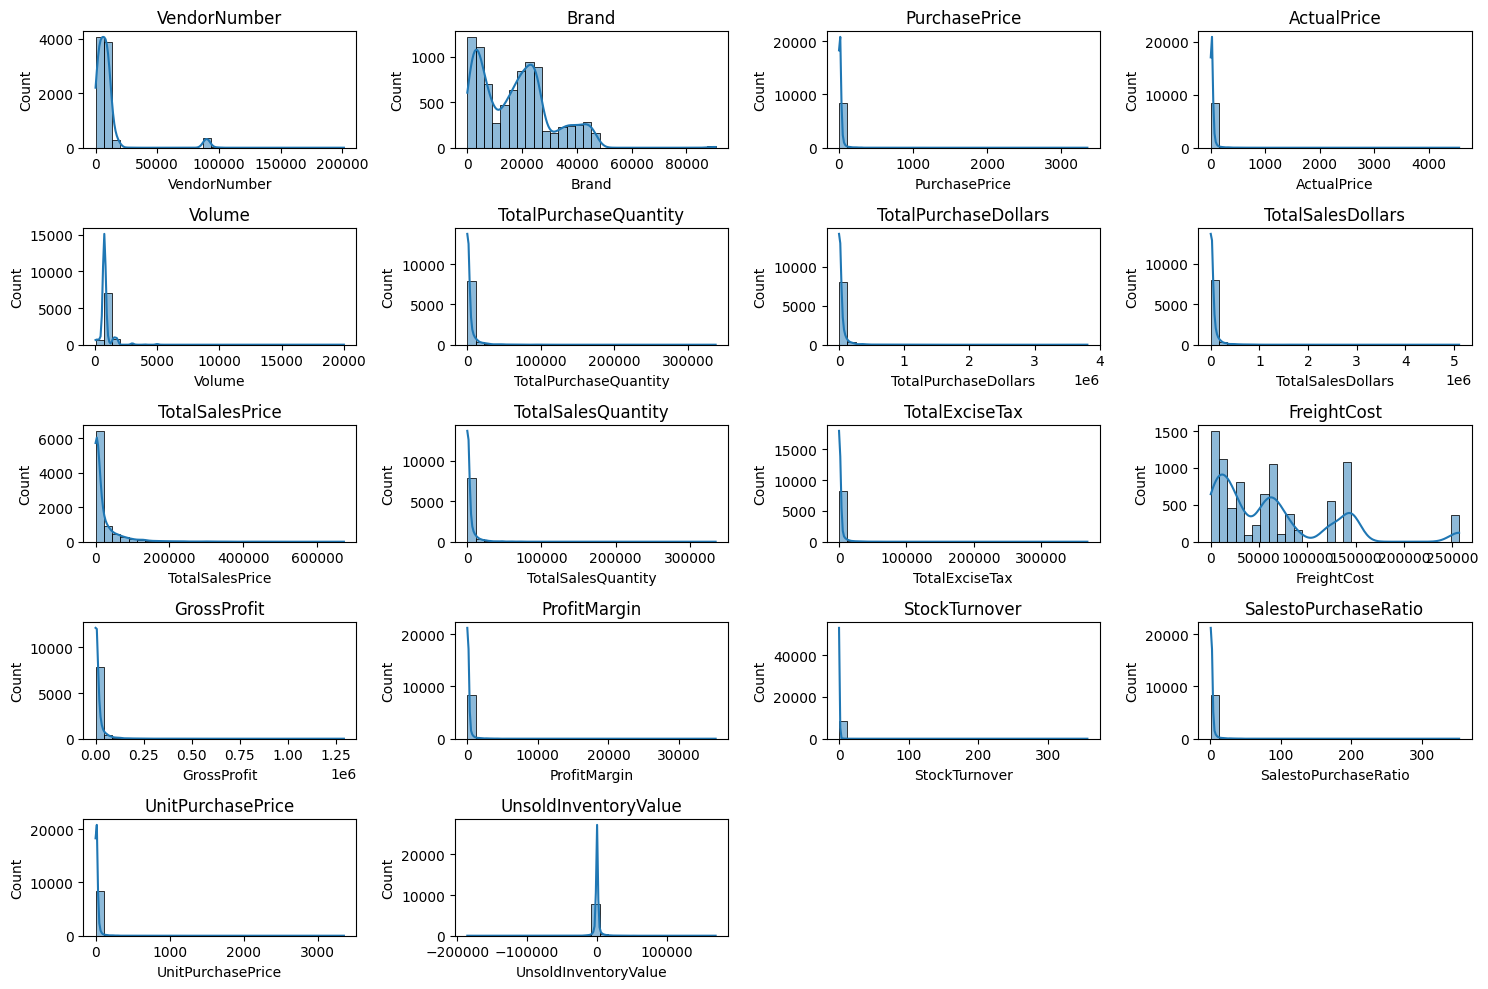

In [173]:
# Distribution plot for numerical columns
numerical_cols= df.select_dtypes(include= np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1) # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
    
plt.tight_layout()
plt.show()

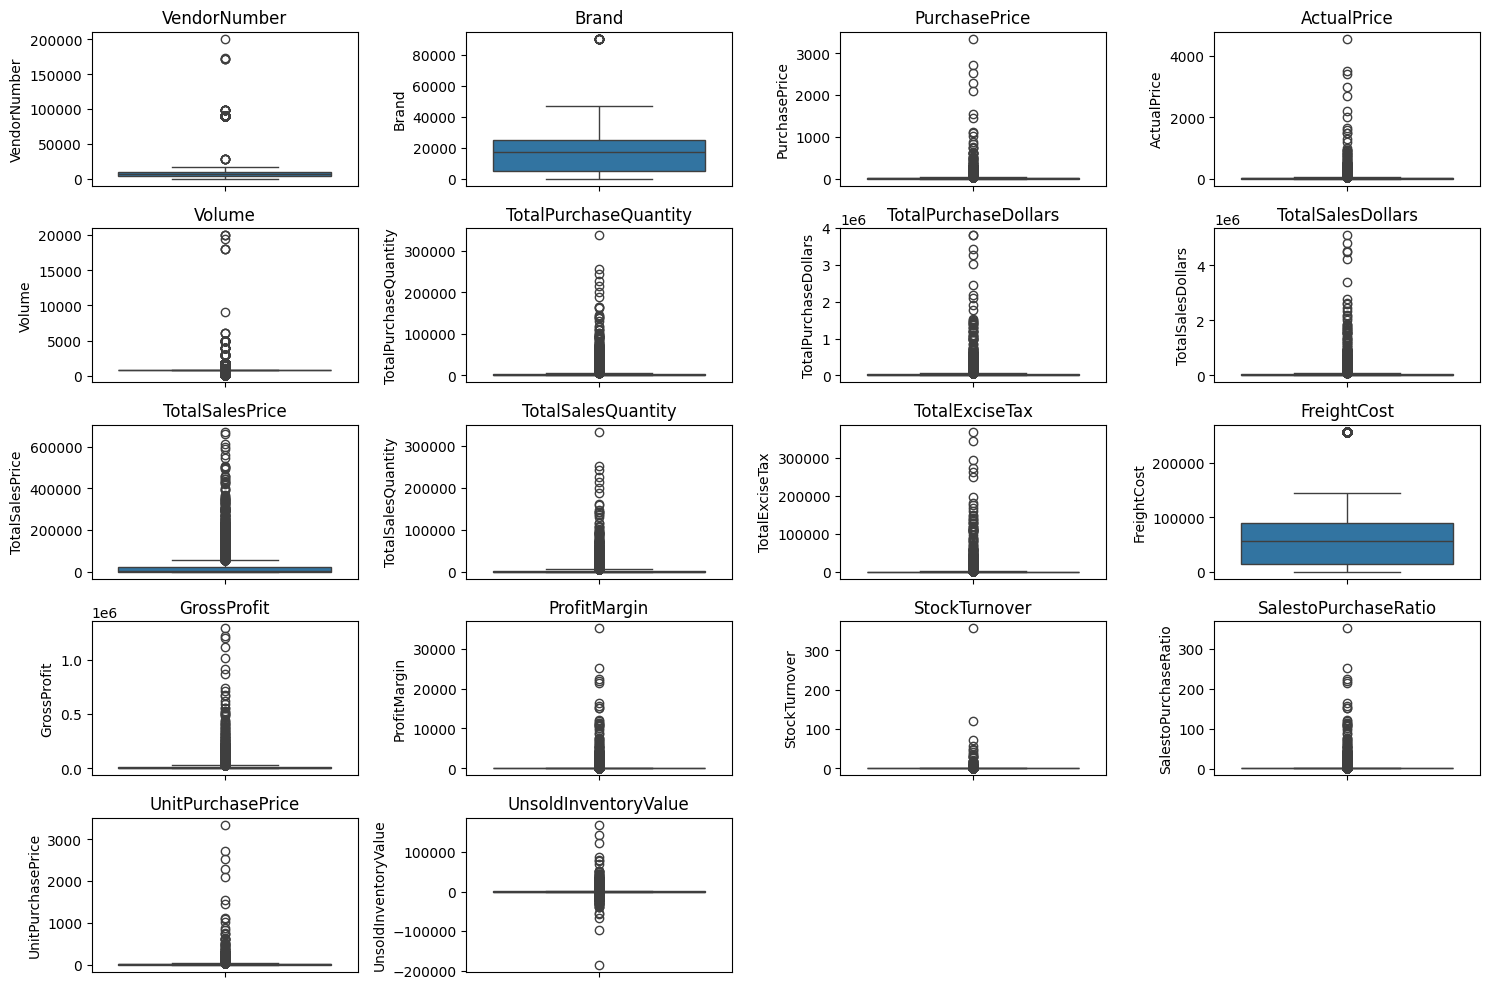

In [174]:
# Outlier detection with boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

## Summary Statistics Insights 

#### Negative & Zero Values:

* Gross Peofit: Minimum Value is -52,002.78, indicating losses, Some products or transactions may be selling at loss due to high costs or seeling at 
discounts lower than the purchase price
* Profit Margin: Has a minimum of ----..., which suggests cases where revenue is zero or even lower than costs.
* Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete
stock.

#### Outlier Indicated by High Standard Deviation:

* Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating portential premium 
products.
*Freight Cost: Huge Variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
* Stock Turnover: Ranges from 0 to 274.0, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates
that Sold quantity for that product is higher than purchased quantity due to sales are being fulfilled from older stock.

In [122]:
# let's filter the data by removing inconsistencies
df= pd.read_sql_query(""" SELECT *  FROM Vendor_Sales_Summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [123]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,33.864673,0.037271,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,26.682999,0.042125,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,32.759433,0.054746,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,37.249347,0.061453,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,39.689707,0.044932,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,504.166667,1.893939,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,2705.982906,57.264957,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,33.783784,1.351351,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,9646.938776,48.979592,97.469388


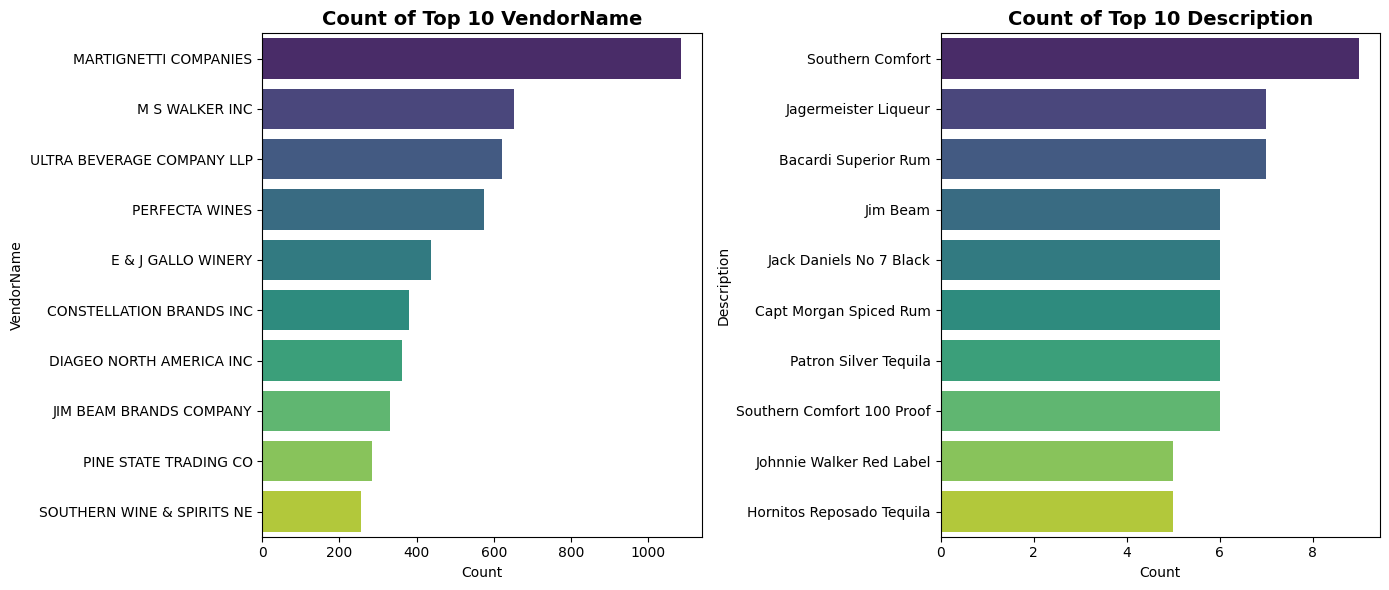

In [180]:
# Distribution plot for categorical columns
categorical_cols = ["VendorName", "Description"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for ax, col in zip(axes, categorical_cols):
    sns.countplot(
        y=df[col], 
        order=df[col].value_counts().index[:10], 
        palette="viridis", 
        ax=ax
    )
    ax.set_title(f"Count of Top 10 {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel("Count")
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

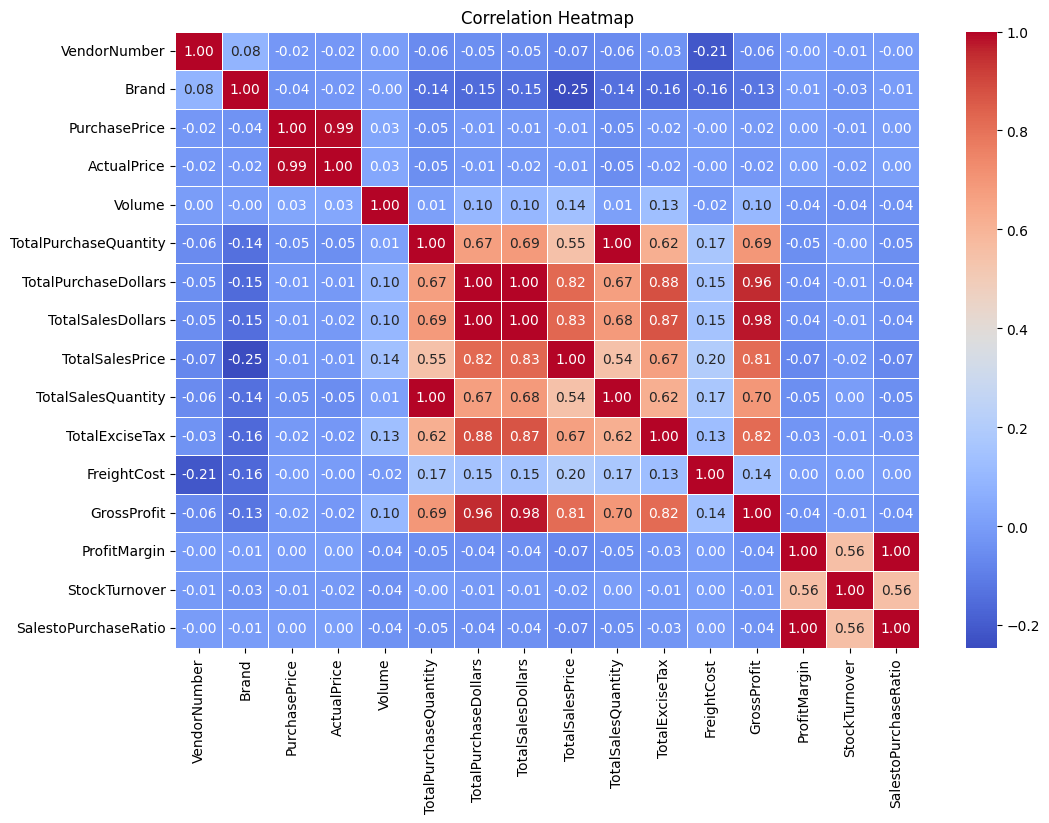

In [125]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap= "coolwarm", linewidths= 0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation insights

* PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016) suggesting that price variations do not significantly 
impact sales revenue profit.
* Strong correlation between total purchase quantity (0.999), confirming efficient inventory turnover.
* Negative correlation between profit margin & total sales price (-0.179) suggests that as sales increases, margins decrease, possibly due to competitive
pricing pressures.
* StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover doea not necessarily result in higher profitability.

## Data Analysis

### Identify Brands that needs Promotional  Adjustments which exhibit lower sales performance but higher profit margins.

In [185]:
brand_performance= df.groupby("Description").agg({
    "TotalSalesDollars":"sum",
    "ProfitMargin":"mean"}).reset_index()

In [182]:
low_sales_threshold= brand_performance["TotalSalesDollars"].quantile(0.15)

In [183]:
high_margin_threshold= brand_performance["ProfitMargin"].quantile(0.85)

In [184]:
low_sales_threshold

np.float64(560.299)

In [186]:
high_margin_threshold

np.float64(193.9320461403933)

In [131]:
# filter brands with low sales but high profit margins
target_brands= brand_performance[
(brand_performance["TotalSalesDollars"]<= low_sales_threshold)&
(brand_performance["ProfitMargin"]>= high_margin_threshold)
]
print("Brands with low sales but High Profit Margins:")
display(target_brands.sort_values("TotalSalesDollars"))

Brands with low sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,198.208955
2070,Concannon Glen Ellen Wh Zin,15.95,504.166667
2188,Crown Royal Apple,27.86,880.985915
6237,Sauza Sprklg Wild Berry Marg,27.96,460.320641
4828,Merry Irish Cream Liqueur,35.97,277.836134
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,330.057803
2271,Dad's Hat Rye Whiskey,538.89,451.012270
57,A Bichot Clos Marechaudes,539.94,209.989666
6245,Sbragia Home Ranch Merlot,549.75,198.015938


In [132]:
brand_performance= brand_performance[brand_performance["TotalSalesDollars"]<10000]         # for better visualization

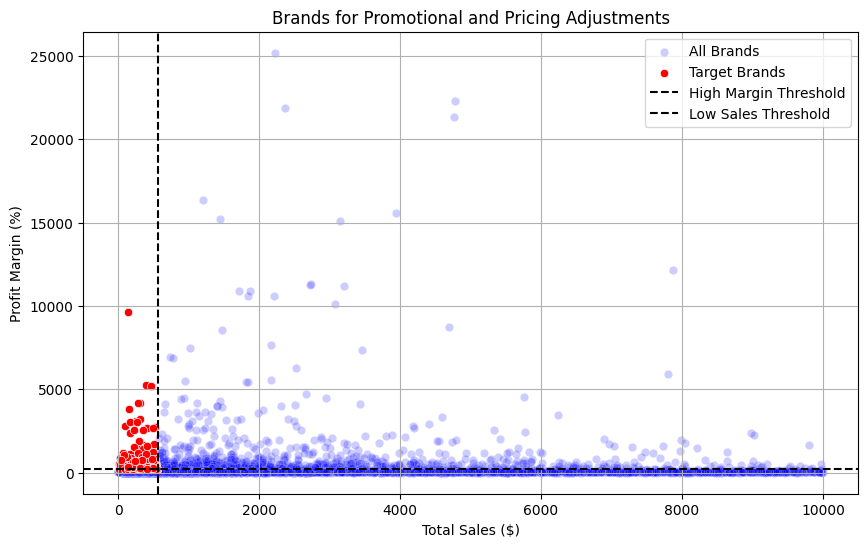

In [133]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x="TotalSalesDollars", y="ProfitMargin", color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data= target_brands, x="TotalSalesDollars", y="ProfitMargin", color="red", label="Target Brands")


plt.axhline(high_margin_threshold, linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional and Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### Which vendors and brands demonstrate the highets sales performance?

In [134]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/ 1_000_000:.2f}M"
    elif value>= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [135]:
top_vendors= df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands= df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [136]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [137]:
top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

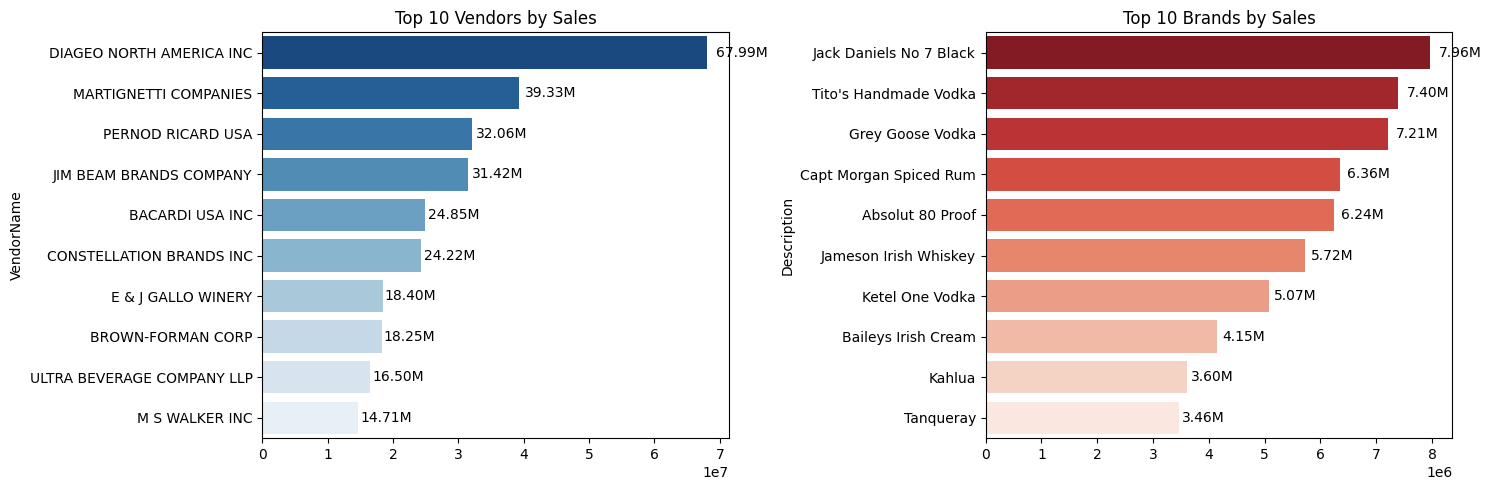

In [138]:
plt.figure(figsize=(15,5))
# plot for top categories
plt.subplot(1, 2, 1)
ax1= sns.barplot(y= top_vendors.index, x= top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y()+ bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha= "left", va="center", fontsize=10, color="black")
# plot for top brands
plt.subplot(1, 2, 2)
ax2= sns.barplot(y= top_brands.index.astype(str), x= top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y()+ bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha= "left", va="center", fontsize=10, color="black")
plt.tight_layout()
plt.show()         

### which vendors contribute the most total purchase dollars?

In [139]:
vendor_performance= df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars": "sum"   
}).reset_index()

In [140]:
vendor_performance["PurchaseContribution%"]= vendor_performance["TotalPurchaseDollars"]/vendor_performance["TotalPurchaseDollars"].sum()*100

In [141]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000145
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.008362
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.003809
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000304
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.033981
...,...,...,...,...,...
114,WEIN BAUER INC,42694.64,13522.49,56217.13,0.013892
115,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.097097
116,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,1.912074
117,WINE GROUP INC,5203801.17,3100242.11,8304043.28,1.693183


In [142]:
vendor_performance= round(vendor_performance.sort_values("PurchaseContribution%", ascending=False),2)

In [143]:
# Display top 10 vendors
top_vendors= vendor_performance.head(10)
top_vendors["TotalSalesDollars"]=top_vendors["TotalSalesDollars"].apply(format_dollars)
top_vendors["TotalPurchaseDollars"]=top_vendors["TotalPurchaseDollars"].apply(format_dollars)
top_vendors["GrossProfit"]= top_vendors["GrossProfit"].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [144]:
top_vendors["PurchaseContribution%"].sum()

np.float64(65.69000000000001)

In [145]:
top_vendors["CumulativeContribution%"]= top_vendors["PurchaseContribution%"].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


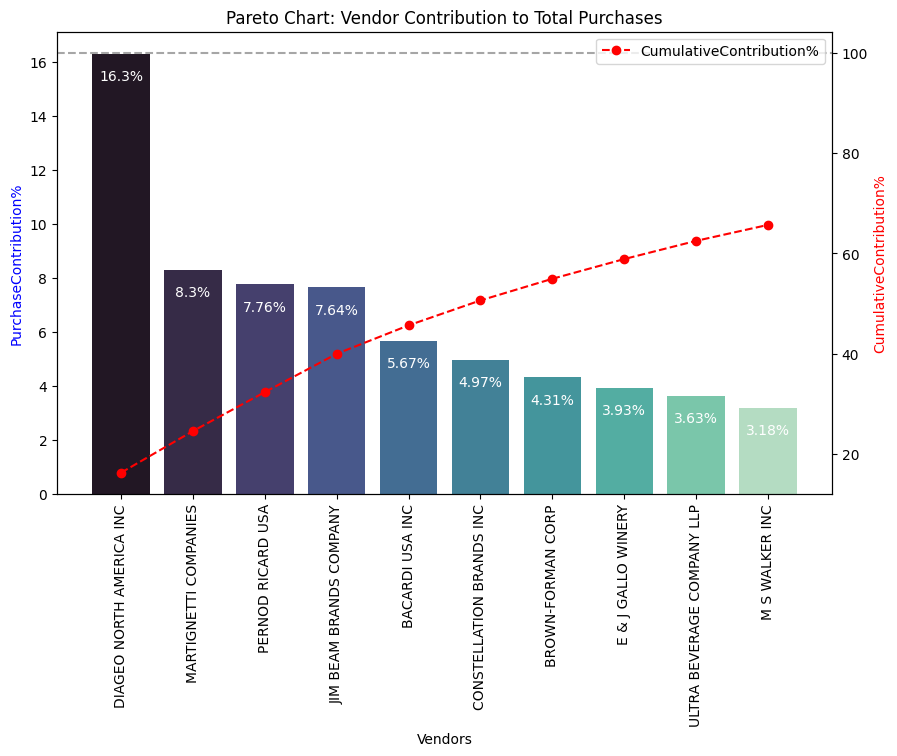

In [146]:
fig, ax1= plt.subplots(figsize=(10,6))

# Bar plot for purchase contrbibution%
sns.barplot(x=top_vendors["VendorName"], y=top_vendors["PurchaseContribution%"], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors["PurchaseContribution%"]):
    ax1.text(i, value-1, str(value)+"%", ha="center", fontsize=10, color="white")

# Line plot for cumulative Contribution%
ax2=ax1.twinx()
ax2.plot(top_vendors["VendorName"], top_vendors["CumulativeContribution%"], color="red", marker="o", linestyle="dashed", label= "CumulativeContribution%")

ax1.set_xticklabels(top_vendors["VendorName"], rotation=90)
ax1.set_ylabel("PurchaseContribution%", color="blue")
ax2.set_ylabel("CumulativeContribution%",color="red")
ax1.set_xlabel("Vendors")
ax1.set_title("Pareto Chart: Vendor Contribution to Total Purchases")

ax2.axhline(y=100, color="gray", linestyle="dashed", alpha=0.7)
ax2.legend(loc= "upper right")

plt.show()

In [147]:
print(f"Total purchase Cpntribution of Top 10 vendors is {round(top_vendors["PurchaseContribution%"].sum(),2)}%")

Total purchase Cpntribution of Top 10 vendors is 65.69%


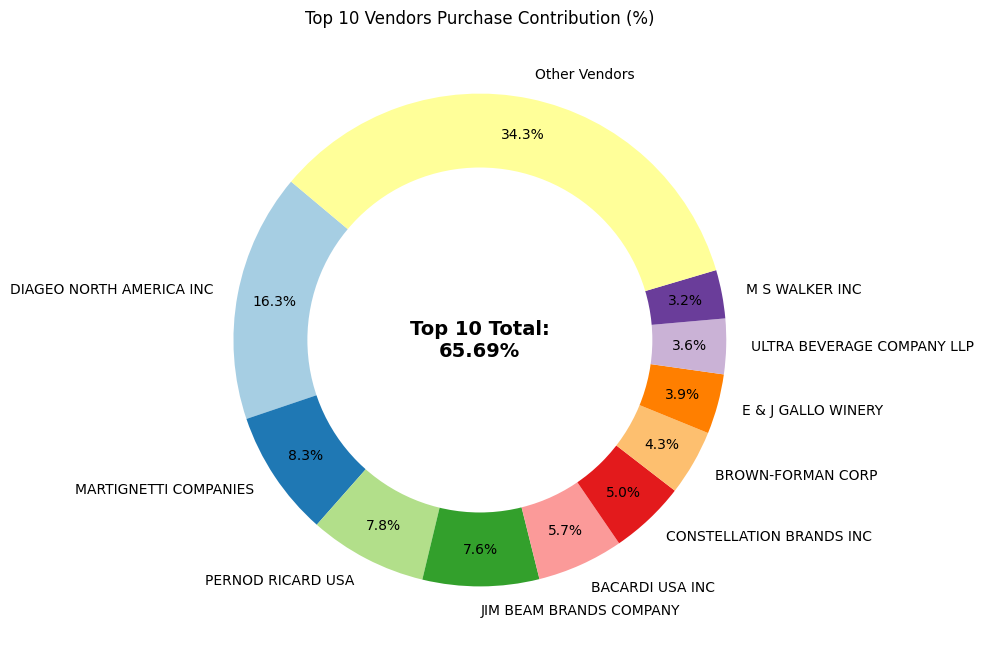

In [148]:
vendors= list(top_vendors["VendorName"].values)
purchase_contributions= list(top_vendors["PurchaseContribution%"].values)
total_contribution= sum(purchase_contributions)
remaining_contribution= 100-total_contribution

# Append "other vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax= plt.subplots(figsize=(8,8))
wedges, texts, autotexts= ax.pie(purchase_contributions, labels= vendors, autopct= "%1.1f%%",
                                 startangle=140, pctdistance=0.85, colors= plt.cm.Paired.colors)
# Draw a white circle in the center to create a "donut" effect
centre_circle= plt.Circle((0, 0), 0.70, fc="white")
fig.gca().add_artist(centre_circle)

#Add Total Contribution annotation in the center
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight="bold", ha="center", va="center")

plt.title("Top 10 Vendors Purchase Contribution (%)")
plt.show()            

#### Does purchase in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [149]:
df["UnitPurchasePrice"]= df["TotalPurchaseDollars"]/df["TotalPurchaseQuantity"]

In [150]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5101919.51,672819.31,142049.0,260999.20,68601.68,1290667.91,33.864673,0.037271,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4819073.49,561512.37,160247.0,294438.66,144929.24,1015032.27,26.682999,0.042125,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4538120.60,461140.15,187140.0,343854.07,123780.22,1119816.92,32.759433,0.054746,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4475972.88,420050.01,200412.0,368242.80,257032.07,1214774.94,37.249347,0.061453,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4223107.62,545778.28,135838.0,249587.83,257032.07,1199901.61,39.689707,0.044932,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.31,504.166667,1.893939,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,63.32,2705.982906,57.264957,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.98,0.99,2.0,0.10,14069.87,0.50,33.783784,1.351351,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,141.81,9646.938776,48.979592,97.469388,1.47


In [151]:
df["OrderSize"]= pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

In [152]:
df[["OrderSize","TotalPurchaseQuantity"]]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [ ]:
df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()

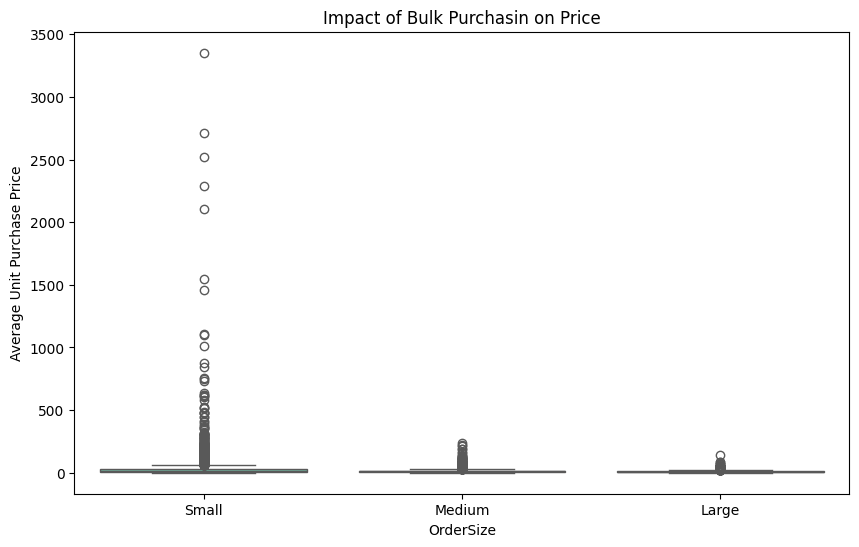

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.title("Impact of Bulk Purchasin on Price")
plt.show()

* Vendors buying in bulk (Large Order Size) get the lower unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.
* The price difference between Small and Large is substantial (72% reduction in unit cost)
* This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite
lower per-unit.

#### Which vendors have low inventory turnover , indicating excess stock and slow moving products?

In [154]:
df[df["StockTurnover"]<1].groupby("VendorName")[["StockTurnover"]].mean().sort_values("StockTurnover", ascending= True).head(10)

,StockTurnover
VendorName,
ALTAMAR BRANDS LLC,0.034938
CALEDONIA SPIRITS INC,0.036798
MARSALLE COMPANY,0.037491
TAMWORTH DISTILLING,0.041150
DJINN SPIRITS LLC,0.041987
BULLY BOY DISTILLERS,0.044549
SWEETWATER FARM,0.046051
TALL SHIP DISTILLERY LLC,0.046322
SMOKY QUARTZ DISTILLERY LLC,0.047437


#### How much capital is locked in unsold inventory per vendor,  and which vendors contribute most of it?

In [155]:
df["UnsoldInventoryValue"]= (df["TotalPurchaseQuantity"]- df["TotalSalesQuantity"])* df["PurchasePrice"]
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [156]:
# Aggregate Capital locked per vendor
inventory_value_per_vendor= df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort vendors with the highest Locked Capital
inventory_value_per_vendor=inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"]= inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


#### What is the 95% confidence intervals for profit margins of top performing and low performing vendors?

In [157]:
top_threshold= df["TotalSalesDollars"].quantile(0.75)

In [158]:
low_threshold= df["TotalSalesDollars"].quantile(0.25)

In [159]:
top_vendors= df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors= df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()

In [160]:
low_vendors

5631        4.288079
5652        6.548044
5701       13.645753
5704        1.705921
5724        7.804622
            ...     
8559      504.166667
8560     2705.982906
8561       33.783784
8562     9646.938776
8563    11891.549296
Name: ProfitMargin, Length: 2141, dtype: float64

In [161]:
def confidence_interval(data, confidence=0.95):
    mean_val= np.mean(data)
    std_err= np.std(data, ddof=1)/np.sqrt(len(data)) # standard error
    t_critical= stats.t.ppf((1+confidence)/ 2, df=len(data)-1)
    margin_of_error= t_critical* std_err
    return mean_val, mean_val-margin_of_error, mean_val+margin_of_error

Top vendors 95% CI: (48.49, 54.23), Mean: 51.36
Low vendors 95% CI: (214.85, 281.05), Mean: 247.95


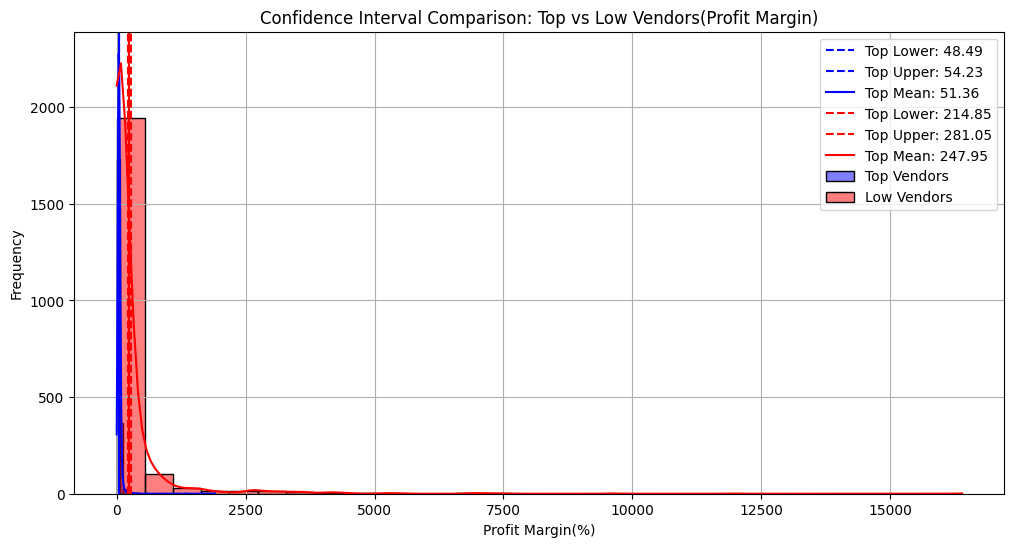

In [162]:
top_mean, top_lower, top_upper= confidence_interval(top_vendors)
low_mean, low_lower, low_upper= confidence_interval(low_vendors)

print(f"Top vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

# Top Vendor plot
sns.histplot(top_vendors, kde=True, color= "blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label= f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label= f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label= f"Top Mean: {top_mean:.2f}")

# Low Vendor plot
sns.histplot(low_vendors, kde=True, color= "red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label= f"Top Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label= f"Top Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label= f"Top Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors(Profit Margin)")
plt.xlabel("Profit Margin(%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

* The confidence interval for low-performing vendors (40.48%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
* This suggests that vendors with lower sales tend to maintain highe profit margins, potentially due to premium pricing or lower operational costs.
* For High-performing Vendors:If they aim to improve profitablity, they could explore selective price adjustments, cost optimization, or bundling strategies.
* For Low-performing Vendors: Despite higher margins, their low sales might indicate a need for better marketing, competitive pricing, or improved
distribution strategies.

#### Is there any significant different in profit margin  between top-performing and low-performing vendors?

H0 (Null Hypothesis): Reject HA: There is no significant difference in the mean profit margins of top performing and low performing vendors.
    
HA (Alternative Hypothesis) : The mean profit margins of Top-performing and low-performing vendors are significantly different.

In [164]:
top_threshold= df["TotalSalesDollars"].quantile(0.75)
low_threshold= df["TotalSalesDollars"].quantile(0.25)
top_vendors= df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors= df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()


# Performs Two-Sample T-Test
t_stat, p_value, = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print Results
print(f"T-Statistic: {t_stat:.4f}, P-Value{p_value:.4f}")
if p_value < 0.05:
      print("Reject HA: There is significant difference in profit margin between top performing and low performing vendors.")
else:
    print("Fail to Reject H0: No Significant differnce in profit margin.")

T-Statistic: -11.6040, P-Value0.0000
Reject HA: There is significant difference in profit margin between top performing and low performing vendors.
